In [1]:
import pandas as pd
import numpy as np

In [18]:
data = pd.read_csv("norm_data__non_log.txt",sep='\t').T
label = pd.read_csv("sample_list.csv",sep=';')
data = data.apply(np.log)

# Conversion of string to bool
mapping = {'Non-LCa':0,'LCa':1}
target = label.Disease.map(mapping).values

In [103]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, accuracy_score, roc_auc_score

skf = StratifiedKFold(n_splits=10)

recall = []
precision = []
accuracy = []
auc = []

for train_index,test_index in skf.split(data,target):
    X_train, X_test = data.values[train_index], data.values[test_index]
    y_train, y_test = target[train_index], target[test_index]
    model = LogisticRegression(penalty='l2',solver='liblinear',class_weight={1:2,0:1}).fit(X_train,y_train)
    y_pred = model.predict(X_test)
    recall.append(recall_score(y_test,y_pred))
    precision.append(precision_score(y_test,y_pred))
    accuracy.append(accuracy_score(y_test,y_pred))
    auc.append(roc_auc_score(y_test,y_pred))

print(np.mean(recall))
print(np.mean(precision))
print(np.mean(accuracy))
print(np.mean(auc))

0.907568306010929
0.9197586286957519
0.9655273943054358
0.9437431693989071


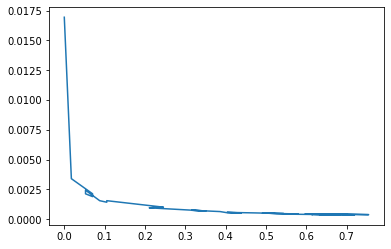

In [75]:
from sklearn.metrics import recall_score
cond = []
ind = []
for i in range(1,244):
    model=LogisticRegression(solver='liblinear').fit(X_train.values[:,0:i],y_train)
    y_pred=model.predict(X_test.values[:,0:i])
    cond.append(recall_score(y_test,y_pred) * (1/(len(y_test[y_test==1])) + 1))
    ind.append((1/(len(y_test[y_test==1]) + 1)) * (1/(len(y_pred[y_pred==1]) + 1)))
    
import matplotlib.pyplot as plt
plt.plot(cond,ind)
plt.show()

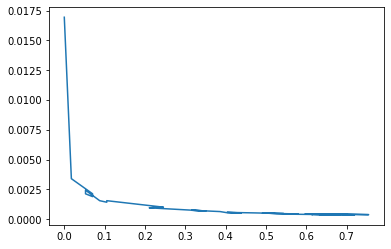

In [79]:
import matplotlib.pyplot as plt
plt.plot(cond,ind)
plt.show()

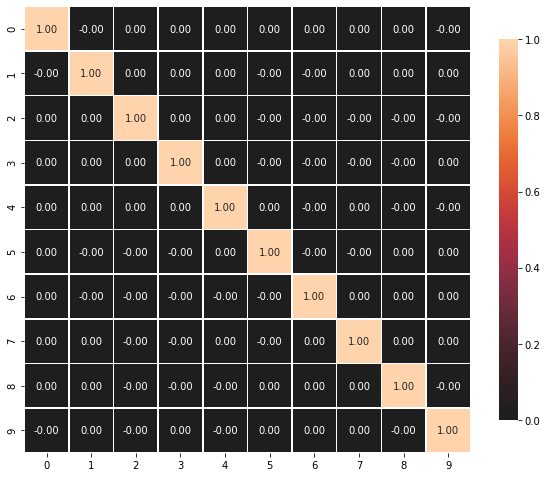

In [90]:
from sklearn.decomposition import PCA
model = PCA(n_components=10).fit_transform(data)
model = pd.DataFrame(model)

# fig, ax = plt.subplots(figsize=(10,10))
# sns.heatmap(model.corr(), vmax=1.0, center=0, fmt='.2f',
#                 square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
# plt.show();

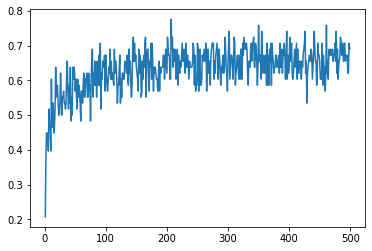

In [41]:
import matplotlib.pyplot as plt
plt.plot(range(1,500),rec_score)
plt.show()